# Universidade de Fortaleza
## Mestrado em Informática Aplicada
### Ciência de Dados aplicada à Ciência da Cidade

# Gibrat's Law for City Growth

## Introduction

**Gibrat's Law**, also known as the **Law of Proportionate Effect**, was originally proposed by Robert Gibrat in 1931 to describe the growth of firms. However, it has been widely applied to urban systems to understand city growth dynamics.

The law states that the **growth rate of cities is independent of their initial size**. In other words, on average, large cities do not grow proportionally faster or slower than small cities.

## Mathematical Formulation

### Basic Formulation

Let $N_i(t)$ be the population of city $i$ at time $t$. Gibrat's Law can be expressed as:

$$
N_i(t+1) = N_i(t) \cdot e^{\epsilon_i(t)}
$$

where $\epsilon_i(t)$ is a random variable representing the growth shock, typically assumed to be drawn from a normal distribution:

$$
\epsilon_i(t) \sim \mathcal{N}(\mu, \sigma^2)
$$

### Growth Rate Formulation

Taking the logarithm of both sides:

$$
\ln N_i(t+1) = \ln N_i(t) + \epsilon_i(t)
$$

The growth rate can be defined as:

$$
g_i(t) = \frac{N_i(t+1) - N_i(t)}{N_i(t)} = e^{\epsilon_i(t)} - 1
$$

Or in logarithmic form:

$$
g_i(t) \approx \ln N_i(t+1) - \ln N_i(t) = \epsilon_i(t)
$$

### Key Implication

The crucial aspect of Gibrat's Law is that the growth rate $g_i(t)$ is **independent** of the initial size $N_i(t)$:

$$
\mathbb{E}[g_i(t) | N_i(t)] = \mu
$$

$$
\text{Var}[g_i(t) | N_i(t)] = \sigma^2
$$

This means that regardless of city size, the expected growth rate is the same.

## Regression Test

Gibrat's Law is typically tested using the regression:

$$
\ln N_i(t+\Delta t) - \ln N_i(t) = \alpha + \beta \ln N_i(t) + u_i
$$

where:
- $\alpha$ is the constant term (average growth rate)
- $\beta$ is the coefficient testing for size dependence
- $u_i$ is the error term

**Gibrat's Law holds if $\beta = 0$** (no relationship between initial size and growth rate).

### Deviations from Gibrat's Law

- If $\beta < 0$: **Convergence** - smaller cities grow faster than larger ones
- If $\beta > 0$: **Divergence** - larger cities grow faster than smaller ones

## Connection to Zipf's Law

Interestingly, if Gibrat's Law holds over a long period, the city size distribution converges to a **log-normal distribution**. However, when combined with a lower bound on city sizes (cities below a certain threshold disappear), it can generate a **power-law distribution** similar to Zipf's Law:

$$
P(N > n) \propto n^{-\alpha}
$$

where $\alpha$ is typically close to 1 for city size distributions.

## Real-World Examples

### Example 1: United States Cities (1990-2000)

Studies of U.S. metropolitan areas have shown mixed results:

| City | 1990 Population | 2000 Population | Growth Rate (%) |
|------|-----------------|-----------------|------------------|
| New York | 16,044,000 | 16,640,000 | 3.7% |
| Las Vegas | 741,000 | 1,375,000 | 85.6% |
| Los Angeles | 11,273,000 | 11,789,000 | 4.6% |
| Austin | 781,000 | 1,249,000 | 59.9% |
| Chicago | 8,066,000 | 8,333,000 | 3.3% |
| Phoenix | 2,006,000 | 2,907,000 | 44.9% |

**Observation**: While large cities like New York and Chicago grew at similar moderate rates (3-4%), some smaller cities like Las Vegas and Austin showed much higher growth rates, suggesting **deviation from Gibrat's Law** with smaller cities growing faster (convergence pattern).

### Example 2: Brazilian Cities (2000-2010)

Brazilian census data reveals interesting patterns:

| City | 2000 Population | 2010 Population | Growth Rate (%) |
|------|-----------------|-----------------|------------------|
| São Paulo | 10,434,252 | 11,253,503 | 7.9% |
| Rio de Janeiro | 5,857,904 | 6,320,446 | 7.9% |
| Brasília | 2,051,146 | 2,570,160 | 25.3% |
| Fortaleza | 2,141,402 | 2,452,185 | 14.5% |
| Manaus | 1,405,835 | 1,802,014 | 28.2% |
| Palmas | 137,355 | 228,332 | 66.2% |

**Observation**: The two largest cities (São Paulo and Rio) grew at identical rates (7.9%), while medium and smaller cities showed higher growth rates. This suggests **convergence** in the Brazilian urban system during this period.

### Example 3: European Cities (2000-2015)

European urban systems often show different patterns:

| City | 2000 Population (Metro) | 2015 Population (Metro) | Growth Rate (%) |
|------|-------------------------|-------------------------|------------------|
| London | 7,640,000 | 8,674,000 | 13.5% |
| Paris | 9,692,000 | 10,843,000 | 11.9% |
| Berlin | 3,382,000 | 3,469,000 | 2.6% |
| Madrid | 5,130,000 | 6,240,000 | 21.6% |
| Barcelona | 4,226,000 | 5,375,000 | 27.2% |
| Dublin | 1,122,000 | 1,801,000 | 60.5% |

**Observation**: Growth rates vary considerably, with some smaller cities (Dublin) growing much faster than larger ones (Berlin), but large cities like London and Paris also showing significant growth. The pattern is **mixed**, neither strongly supporting nor rejecting Gibrat's Law.

## Empirical Testing: A Simple Simulation

Let's simulate city growth under Gibrat's Law and visualize the results:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
n_cities = 100
n_periods = 50
mu = 0.02  # 2% average growth rate
sigma = 0.05  # 5% standard deviation

# Initial population distribution (log-normal)
initial_pop = np.random.lognormal(mean=10, sigma=1.5, size=n_cities)

# Store populations over time
populations = np.zeros((n_cities, n_periods))
populations[:, 0] = initial_pop

# Simulate growth according to Gibrat's Law
for t in range(1, n_periods):
    growth_shocks = np.random.normal(mu, sigma, n_cities)
    populations[:, t] = populations[:, t-1] * np.exp(growth_shocks)

print(f"Simulated {n_cities} cities over {n_periods} time periods")
print(f"Average growth rate: {mu*100:.1f}%")
print(f"Growth volatility: {sigma*100:.1f}%")

Simulated 100 cities over 50 time periods
Average growth rate: 2.0%
Growth volatility: 5.0%


### Visualization 1: Growth Trajectories

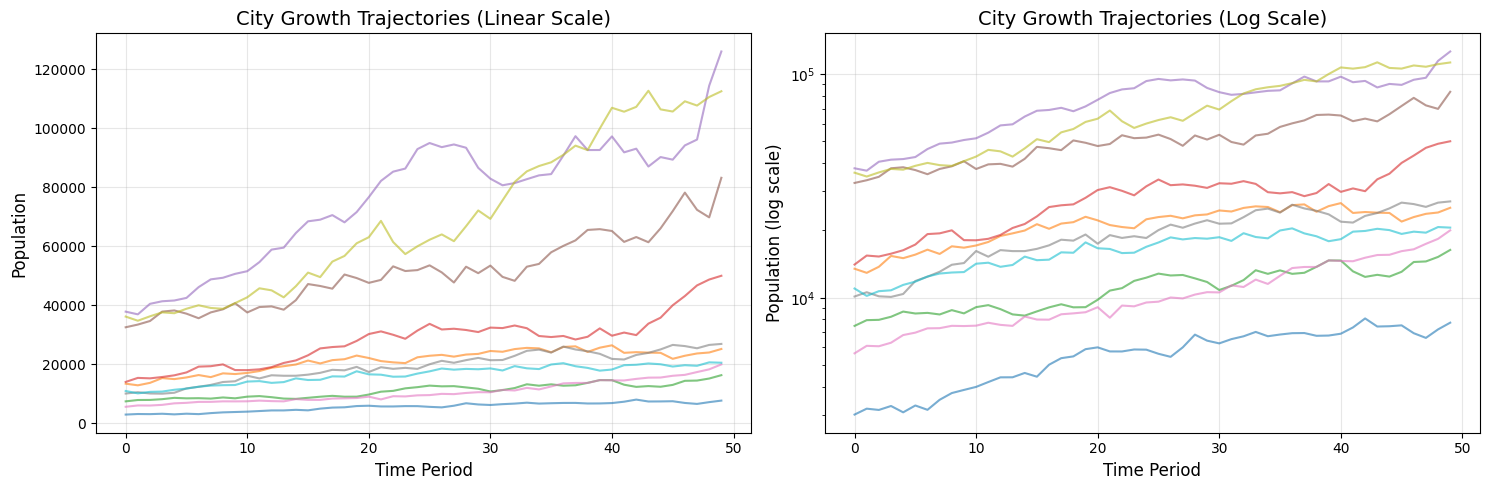

In [2]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot trajectories for a subset of cities
sample_cities = np.random.choice(n_cities, 10, replace=False)
for city in sample_cities:
    ax1.plot(populations[city, :], alpha=0.6, linewidth=1.5)

ax1.set_xlabel('Time Period', fontsize=12)
ax1.set_ylabel('Population', fontsize=12)
ax1.set_title('City Growth Trajectories (Linear Scale)', fontsize=14)
ax1.grid(True, alpha=0.3)

# Plot in log scale
for city in sample_cities:
    ax2.semilogy(populations[city, :], alpha=0.6, linewidth=1.5)

ax2.set_xlabel('Time Period', fontsize=12)
ax2.set_ylabel('Population (log scale)', fontsize=12)
ax2.set_title('City Growth Trajectories (Log Scale)', fontsize=14)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Visualization 2: Testing Gibrat's Law

We test if growth rate is independent of initial size:

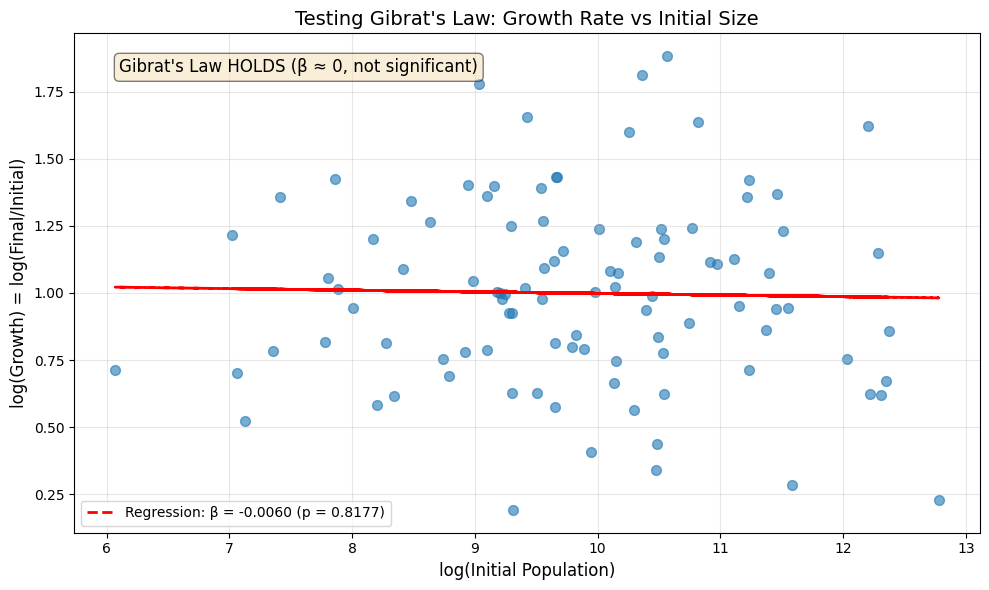


Regression Results:
β (slope): -0.005958
p-value: 0.817682
R²: 0.000545

Gibrat's Law HOLDS (β ≈ 0, not significant)


In [3]:
# Calculate growth rates between initial and final period
initial_size = np.log(populations[:, 0])
final_size = np.log(populations[:, -1])
growth_rate = final_size - initial_size

# Linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(initial_size, growth_rate)

# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(initial_size, growth_rate, alpha=0.6, s=50)
ax.plot(initial_size, slope * initial_size + intercept, 'r--', 
        label=f'Regression: β = {slope:.4f} (p = {p_value:.4f})', linewidth=2)

ax.set_xlabel('log(Initial Population)', fontsize=12)
ax.set_ylabel('log(Growth) = log(Final/Initial)', fontsize=12)
ax.set_title('Testing Gibrat\'s Law: Growth Rate vs Initial Size', fontsize=14)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

# Add interpretation text
if abs(slope) < 0.01 and p_value > 0.05:
    interpretation = "Gibrat's Law HOLDS (β ≈ 0, not significant)"
elif slope < 0 and p_value < 0.05:
    interpretation = "CONVERGENCE detected (smaller cities grow faster)"
elif slope > 0 and p_value < 0.05:
    interpretation = "DIVERGENCE detected (larger cities grow faster)"
else:
    interpretation = "Weak relationship"

ax.text(0.05, 0.95, interpretation, transform=ax.transAxes, 
        fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print(f"\nRegression Results:")
print(f"β (slope): {slope:.6f}")
print(f"p-value: {p_value:.6f}")
print(f"R²: {r_value**2:.6f}")
print(f"\n{interpretation}")

### Visualization 3: City Size Distribution Over Time

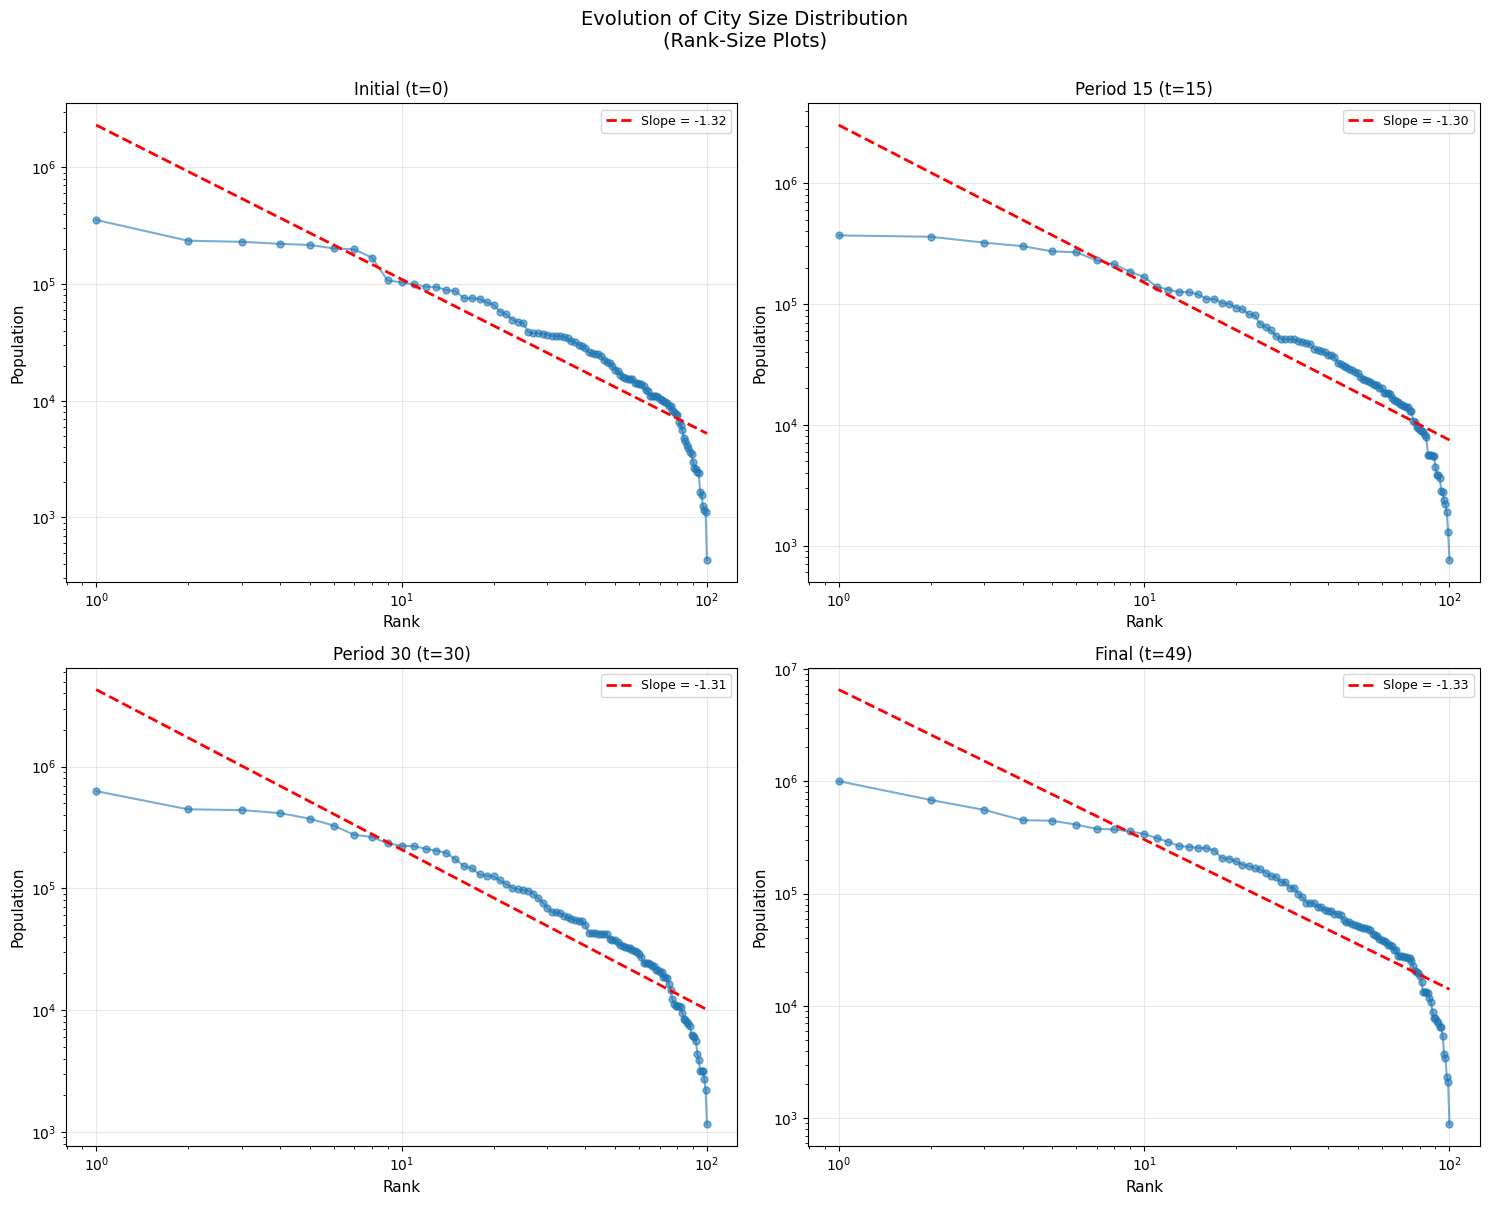

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Select time points to analyze
time_points = [0, 15, 30, 49]
titles = ['Initial', 'Period 15', 'Period 30', 'Final']

for idx, (t, title) in enumerate(zip(time_points, titles)):
    ax = axes[idx // 2, idx % 2]
    
    # Get populations at time t and sort
    pops = np.sort(populations[:, t])[::-1]
    ranks = np.arange(1, len(pops) + 1)
    
    # Plot rank-size distribution
    ax.loglog(ranks, pops, 'o-', markersize=5, alpha=0.6)
    
    # Fit power law
    log_ranks = np.log(ranks)
    log_pops = np.log(pops)
    slope_fit, intercept_fit = np.polyfit(log_ranks, log_pops, 1)
    
    # Plot fitted line
    ax.loglog(ranks, np.exp(intercept_fit) * ranks**slope_fit, 'r--', 
             label=f'Slope = {slope_fit:.2f}', linewidth=2)
    
    ax.set_xlabel('Rank', fontsize=11)
    ax.set_ylabel('Population', fontsize=11)
    ax.set_title(f'{title} (t={t})', fontsize=12)
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.suptitle('Evolution of City Size Distribution\n(Rank-Size Plots)', fontsize=14, y=1.00)
plt.tight_layout()
plt.show()

## Key Findings from Empirical Research

### 1. **Gibrat's Law Often Fails for Small Cities**
- Small cities (below certain thresholds) tend to grow faster than predicted
- This is known as **"mean reversion"** or **convergence**
- Common threshold: cities below 100,000 population

### 2. **Temporal Variations**
- Gibrat's Law may hold in some periods but not others
- Economic booms/busts affect different sized cities differently
- Example: 2008 financial crisis affected larger cities more severely

### 3. **Geographical Variations**
- Developing countries often show convergence (smaller cities grow faster)
- Developed countries show mixed patterns
- Regional factors (natural resources, policy) create deviations

### 4. **Long-term Implications**
- Even with Gibrat's Law, the **absolute gap** between large and small cities grows
- If $N_1 = 1,000,000$ and $N_2 = 100,000$ both grow at 2%:
  - $N_1$ gains 20,000 people
  - $N_2$ gains 2,000 people
  - The gap increases from 900,000 to 918,000

## Policy Implications

### If Gibrat's Law Holds:
1. **No natural convergence** in city sizes without intervention
2. **Random shocks** (natural disasters, policy changes) have lasting effects
3. **Path dependence** is strong - historical advantages persist

### If Convergence Occurs (β < 0):
1. Smaller cities may catch up over time
2. Investment in infrastructure for smaller cities may accelerate growth
3. Regional inequality may naturally decrease

### If Divergence Occurs (β > 0):
1. Large cities become increasingly dominant
2. Risk of excessive concentration and congestion
3. May require active policies to support smaller cities

## Conclusion

Gibrat's Law provides a useful **null hypothesis** for understanding urban growth:
- Simple mathematical framework
- Generates testable predictions
- Connects to broader theories of urban economics

However, **deviations from Gibrat's Law are common and informative**:
- They reveal structural features of urban systems
- They indicate effects of policies, geography, and economic conditions
- They help predict future urban configurations

Understanding where and when Gibrat's Law holds or fails is crucial for:
- Urban planning
- Infrastructure investment
- Regional development policy
- Predicting future urbanization patterns

## References

1. Gibrat, R. (1931). *Les inégalités économiques*. Paris: Sirey.

2. Gabaix, X. (1999). "Zipf's law for cities: an explanation." *Quarterly Journal of Economics*, 114(3), 739-767.

3. Eeckhout, J. (2004). "Gibrat's law for (all) cities." *American Economic Review*, 94(5), 1429-1451.

4. González-Val, R., Ramos, A., Sanz-Gracia, F., & Vera-Cabello, M. (2015). "Size distributions for all cities: which one is best?" *Papers in Regional Science*, 94(1), 177-197.

5. Ioannides, Y. M., & Overman, H. G. (2003). "Zipf's law for cities: an empirical examination." *Regional Science and Urban Economics*, 33(2), 127-137.

6. Pumain, D. (2006). "Alternative explanations of hierarchical differentiation in urban systems." In *Hierarchy in Natural and Social Sciences* (pp. 169-222). Springer.

7. Córdoba, J. C. (2008). "On the distribution of city sizes." *Journal of Urban Economics*, 63(1), 177-197.

## Exercises

1. **Theoretical**: If Gibrat's Law holds perfectly, what would be the expected relationship between the variance of log(population) over time? Derive this mathematically.

2. **Empirical**: Download census data for cities in your country for two different years. Test whether Gibrat's Law holds using regression analysis.

3. **Simulation**: Modify the simulation above to include a size-dependent growth rate. What value of β leads to a stable city size distribution?

4. **Policy**: If you were an urban planner and empirical data showed β < 0 (convergence), how would this influence your recommendations for infrastructure investment?

5. **Extension**: Research and implement a test for Gibrat's Law that accounts for potential measurement errors in population data.